In [3]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print("Python {}".format(sys.version))
print("Numpy {}".format(numpy.__version__))
print("Pandas {}".format(pandas.__version__))
print("Matplotlib {}".format(matplotlib.__version__))
print("Seaborn {}".format(seaborn.__version__))
print("Scipy {}".format(scipy.__version__))
print("Sklearn {}".format(sklearn.__version__))

Python 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Numpy 1.18.5
Pandas 1.0.5
Matplotlib 3.2.2
Seaborn 0.10.1
Scipy 1.5.0
Sklearn 0.23.1


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("creditcard.csv")

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [13]:
print(data.shape)

(284807, 31)


In [18]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [19]:
# this is a really big data so in order to apply machine learning tecniques i will take a sample from it

In [20]:
data = data.sample(frac=0.1,random_state=1)

print(data.shape)

(28481, 31)


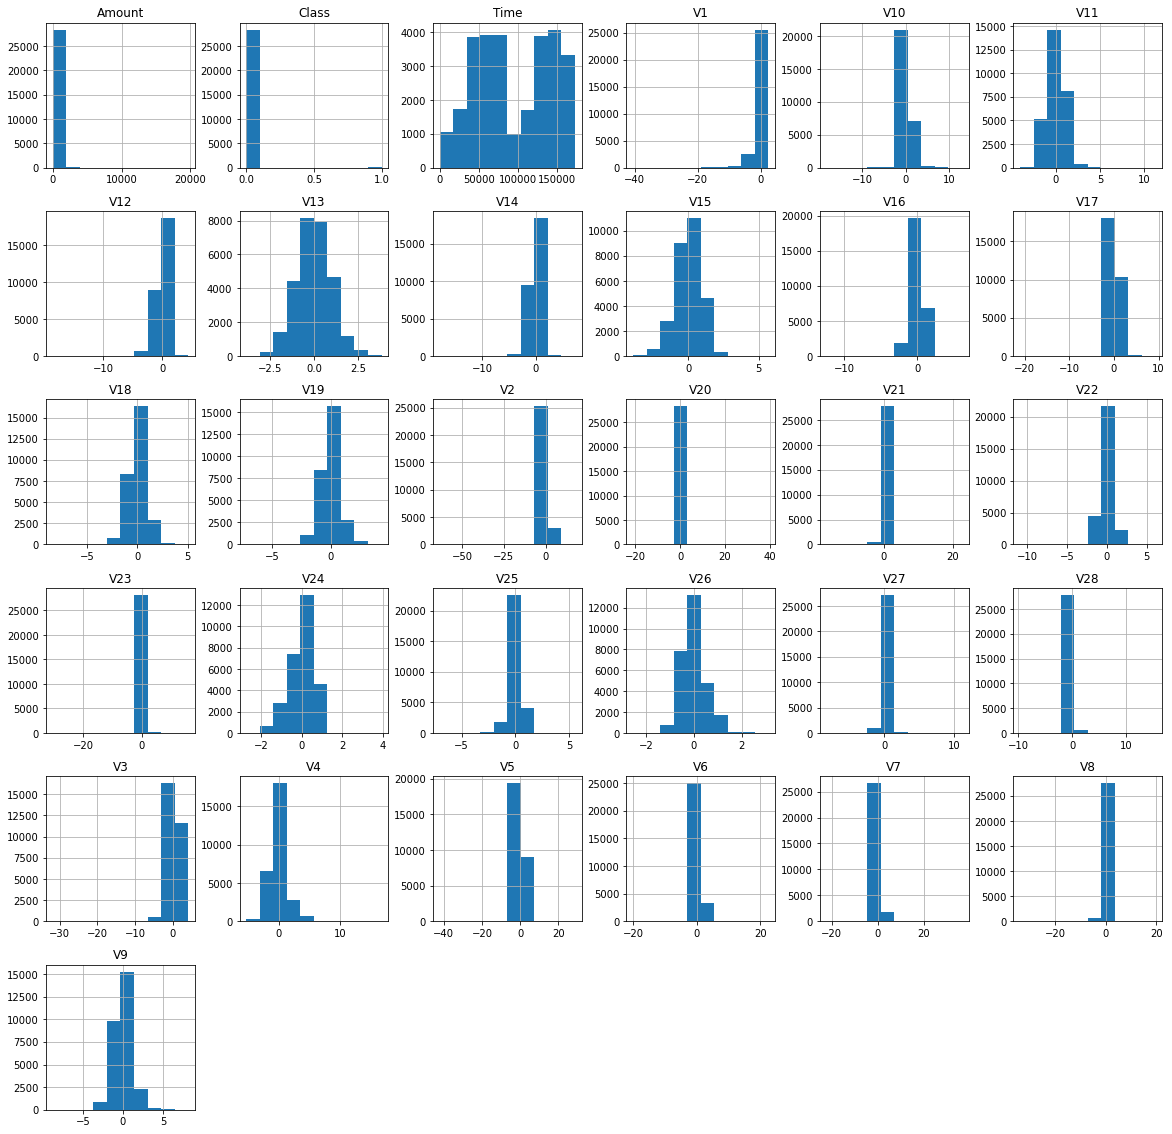

In [21]:
data.hist(figsize=(20,20))
plt.show()

In [27]:
fraud=data[data["Class"]==1]
valid=data[data["Class"]==0]

outlier_fraction=len(fraud)/float(len(valid))

print(outlier_fraction)

print("Fraud Cases : {}".format(len(fraud)))
print("Valid Cases : {}".format(len(valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


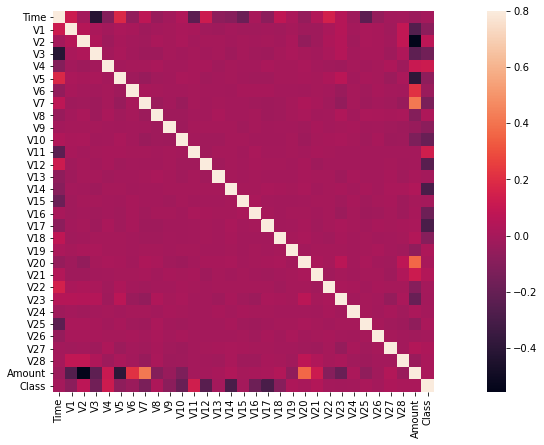

In [29]:
corrset=data.corr()
fig = plt.figure(figsize=(19,7))

sns.heatmap(data=corrset,vmax=.8,square=True)
plt.show()

In [32]:
X=data.drop("Class",axis=1)
y=data["Class"]
print(X.shape)

print(y.shape)

(28481, 30)
(28481,)


In [33]:
#Applying Algorithms

In [47]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


#define a random state
state=1

#outlier detection methods
classifiers={
    "Isolation Forest":IsolationForest(max_samples=len(X),contamination=outlier_fraction,random_state=state),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
}


In [52]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))


Isolation Forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



<Figure size 648x504 with 0 Axes>